In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from pandas import read_csv,set_option
from pandas.plotting import scatter_matrix

In [14]:
fraud_data = pd.read_csv('creditcard.csv')

In [15]:
fraud_data.shape

(284807, 31)

In [16]:
class_names = {0:'Not Fraud', 1:'Fraud'}
Class_count = fraud_data.Class.value_counts().rename(index = class_names)
print(Class_count)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
y = fraud_data['Class']
X = fraud_data.loc[:,fraud_data.columns != 'Class']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
print(y_train.value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [19]:
print(y_test.value_counts())

0    56864
1       98
Name: Class, dtype: int64


In [20]:
from sklearn import preprocessing
scaler_X_train = preprocessing.StandardScaler().fit(X_train)
scaler_X_test = preprocessing.StandardScaler().fit(X_test)
X_train_scaled = scaler_X_train.transform(X_train)
X_test_scaled = scaler_X_test.transform(X_test)

In [21]:
print(X_train_scaled)

[[ 1.02255459  0.99785119 -0.22962626 ...  0.11248883 -0.14374055
  -0.30788875]
 [ 0.47128275 -0.205221   -0.37821992 ... -0.92189789 -0.43984143
  -0.1670264 ]
 [ 1.15338663  0.03655821  0.49556347 ...  0.51372993  0.21235767
  -0.30004345]
 ...
 [-0.31581527 -0.07533181  0.59962034 ... -0.3013968  -0.59571596
  -0.33162078]
 [-0.1444891  -1.50615534  1.42172842 ...  1.23673372  1.01755287
  -0.34315338]
 [-0.38770656  0.62923844 -0.47354037 ...  0.00310728  0.11623211
   0.0961834 ]]


### 1. only random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
cred_randomforest = RandomForestClassifier()
cred_randomforest.fit(X_train_scaled,y_train)
y_pred_randomforest = cred_randomforest.predict(X_test_scaled)

#### 1.1 accuracy score

In [23]:
from sklearn.metrics import accuracy_score
cred_randomforest_acc = accuracy_score(y_test,y_pred_randomforest)*100
print("Accuracy of random forest model: %0.2f  "% cred_randomforest_acc)

Accuracy of random forest model: 99.96  


#### 1.2 confusion matrix

confusion matrix of random forest:
[[56862     2]
 [   22    76]]


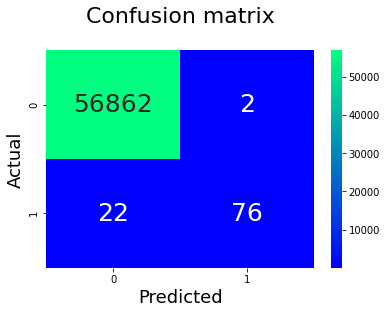

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cred_randomforest_confusion = confusion_matrix(y_test,y_pred_randomforest)
print("confusion matrix of random forest:")
print(cred_randomforest_confusion)
sns.heatmap(pd.DataFrame(cred_randomforest_confusion), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 1.3 average precision score

In [25]:
from sklearn.metrics import average_precision_score
cred_randomforest_acc_ave = average_precision_score(y_test,y_pred_randomforest)*100
print("Average precision score of random forest: %0.2f " % cred_randomforest_acc_ave)

Average precision score of random forest: 75.60 


#### 1.4 ROC_AUC

In [26]:
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_randomforest)

0.8877375162220206

AUC -  0.8877375162220206 



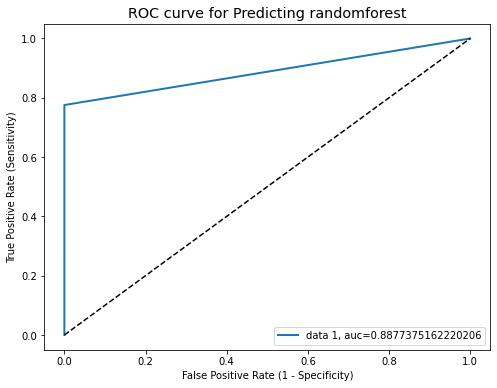

In [27]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_randomforest)
auc_randomforest = metrics.roc_auc_score(y_test, y_pred_randomforest)
print("AUC - ",auc_randomforest,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc_randomforest))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting randomforest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 1.5 precision recall curve

f1_randomforest=0.864


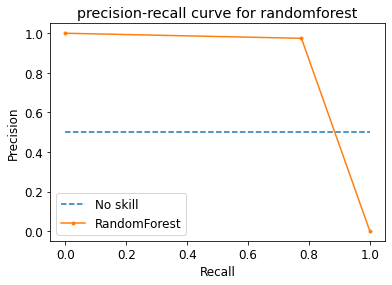

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_randomforest)
f1 = metrics.f1_score(y_test, y_pred_randomforest)
print('f1_randomforest=%.3f' % (f1))
plt.title("precision-recall curve for randomforest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'RandomForest')
plt.legend()
plt.show()

### 2. random forest with random undersampling

In [29]:
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [30]:
print('Original dataset shape %s' % Counter(y_train))
# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 394, 1: 394})


In [31]:
# Undersampling with Logistic Regression
cred_RF_ruc = RandomForestClassifier()
cred_RF_ruc.fit(X_train_rus, y_train_rus)
y_pred_RF_ruc = cred_RF_ruc.predict(X_test)

#### 2.1 accuracy score

In [32]:
cred_RF_ruc_acc = accuracy_score(y_test,y_pred_RF_ruc)*100
print("Accuracy of Random Forest model with random undersampling: %0.2f " % cred_RF_ruc_acc)

Accuracy of Random Forest model with random undersampling: 97.53 


In [33]:
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_ruc)))

Recall : 0.93878


#### 2.2 confusion matrix

confusion matrix of logistic with random undersampling:
[[55463  1401]
 [    6    92]]


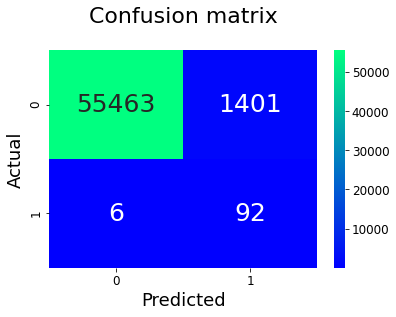

In [34]:
cred_logistic_confusion_rus = metrics.confusion_matrix(y_test , y_pred_RF_ruc)
print("confusion matrix of logistic with random undersampling:")
print(cred_logistic_confusion_rus)
sns.heatmap(pd.DataFrame(cred_logistic_confusion_rus), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 2.3 average precision score

In [35]:
cred_RF_ave_ruc = average_precision_score(y_test,y_pred_RF_ruc)*100
print("Average precision score of RandomForest with random undersampling: %0.2f " % cred_RF_ave_ruc)

Average precision score of RandomForest with random undersampling: 5.80 


#### 2.4 ROC_AUC

AUC -  0.9570688890356368 



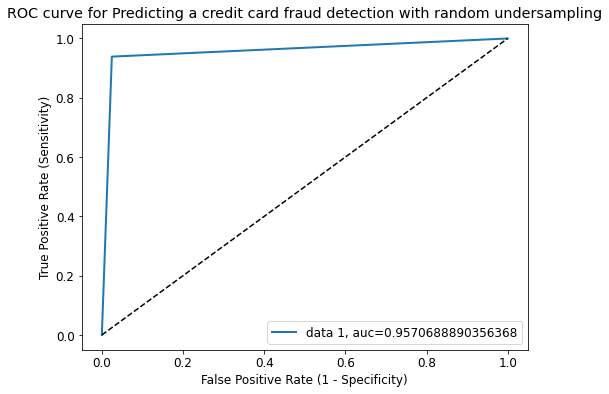

In [36]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF_ruc)

RF_auc_ruc = metrics.roc_auc_score(y_test, y_pred_RF_ruc)
print("AUC - ",RF_auc_ruc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(RF_auc_ruc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with random undersampling')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 2.5 precision recall curve

f1_randomforest=0.116


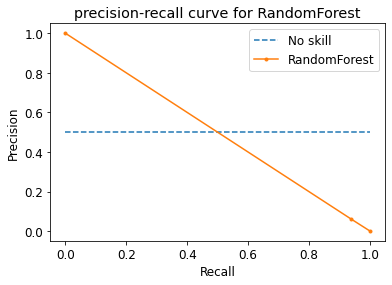

In [37]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_RF_ruc)
f1_ruc = metrics.f1_score(y_test, y_pred_RF_ruc)
print('f1_randomforest=%.3f' % (f1_ruc))
plt.title("precision-recall curve for RandomForest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'RandomForest')
plt.legend()
plt.show()

### 3. random forest with random oversampling

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
print('Original dataset shape %s' % Counter(y_train))
RF_ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = RF_ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


In [40]:
# Oversampling with Logistic Regression
cred_RF_ros = RandomForestClassifier()
cred_RF_ros.fit(X_train_ros, y_train_ros)

y_pred_RF_ros = cred_RF_ros.predict(X_test)

#### 3.1 accuracy score

In [41]:
cred_RF_ros_acc = accuracy_score(y_test,y_pred_RF_ros)*100
print("Accuracy of Random Forest model with random oversampling: %0.2f " % cred_RF_ros_acc)

Accuracy of Random Forest model with random oversampling: 99.96 


In [42]:
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_ros)))

Recall : 0.79592


#### 3.2 confusion matrix

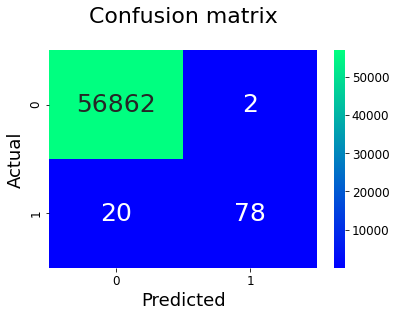

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_RF_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 3.3 average precision score

In [44]:
cred_RF_ave_ros = average_precision_score(y_test,y_pred_RF_ros)*100
print("Average precision score of Random Forest with random oversampling: %0.2f " % cred_RF_ave_ros)

Average precision score of Random Forest with random oversampling: 77.64 


#### 3.4 ROC_AUC

AUC -  0.9570688890356368 



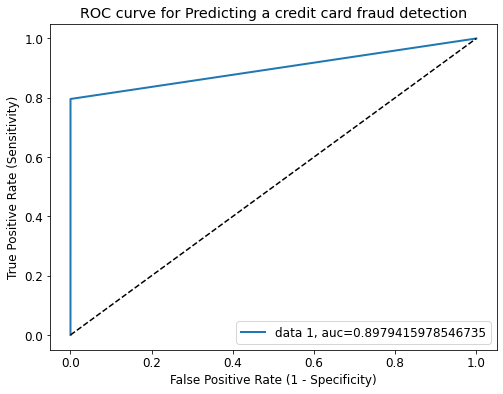

In [45]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF_ros)

RF_auc_roc = metrics.roc_auc_score(y_test, y_pred_RF_ros)
print("AUC - ",RF_auc_ruc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(RF_auc_roc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 3.5 precision recall curve

f1_randomforest=0.876


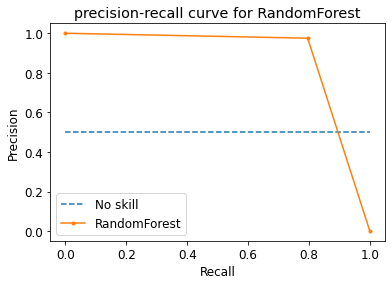

In [46]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_RF_ros)
f1 = metrics.f1_score(y_test, y_pred_RF_ros)
print('f1_randomforest=%.3f' % (f1))
plt.title("precision-recall curve for RandomForest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')

plt.plot(recall, precision, marker='.', label = 'RandomForest')
plt.legend()
plt.show()


### 4. random forest with STOME

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
print('Original dataset shape %s' % Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


In [49]:
cred_RF_smote = RandomForestClassifier()
cred_RF_smote.fit(X_train_smote, y_train_smote)
y_pred_RF_smote = cred_RF_smote.predict(X_test)

#### 4.1 accuracy score

In [50]:
cred_RF_smote_acc = accuracy_score(y_test,y_pred_RF_smote)*100
print("Accuracy of Random Forest model with STOME: %0.2f " % cred_RF_smote_acc)

Accuracy of Random Forest model with STOME: 99.95 


In [51]:
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_smote)))

Recall : 0.84694


#### 4.2 confusion matrix

confusion matrix of RF with SMOTE:
[[56853    11]
 [   15    83]]


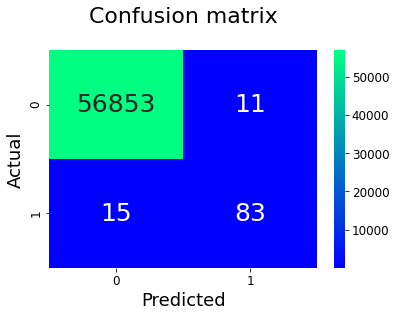

In [52]:
cred_RF_confusion_smote = metrics.confusion_matrix(y_test , y_pred_RF_smote)
print("confusion matrix of RF with SMOTE:")
print(cred_RF_confusion_smote)
sns.heatmap(pd.DataFrame(cred_RF_confusion_smote), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 4.3 average precision score

In [53]:
cred_RF_ave_smote = average_precision_score(y_test,y_pred_RF_smote)*100
print("Average precision score of RF with STOME: %0.2f " % cred_RF_ave_smote)

Average precision score of RF with STOME: 74.81 


#### 4.4 ROC_AUC

AUC -  0.9570688890356368 



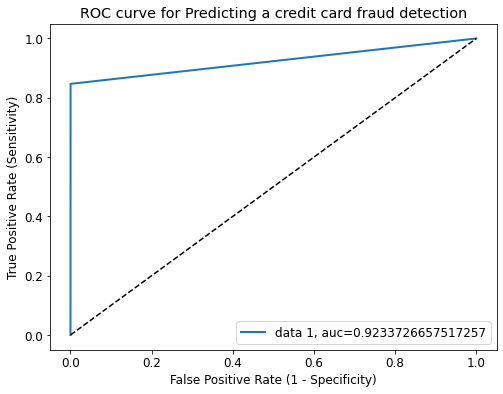

In [54]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF_smote)

RF_auc_roc = metrics.roc_auc_score(y_test, y_pred_RF_smote)
print("AUC - ",RF_auc_ruc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(RF_auc_roc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 4.5 precision recall curve

f1_randomforest=0.865


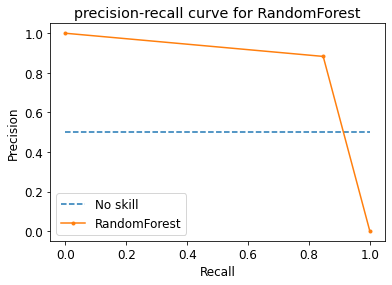

In [55]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_RF_smote)
f1 = metrics.f1_score(y_test, y_pred_RF_smote)
print('f1_randomforest=%.3f' % (f1))
plt.title("precision-recall curve for RandomForest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')

plt.plot(recall, precision, marker='.', label = 'RandomForest')
plt.legend()
plt.show()


### 5. random forest with ADASYN

In [56]:
from imblearn.over_sampling import ADASYN
print('Original dataset shape %s' % Counter(y_train))
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227373})


In [57]:
cred_RF_adasyn = RandomForestClassifier()
cred_RF_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_RF_adasyn = cred_RF_adasyn.predict(X_test)

#### 5.1 accuracy score

In [58]:
cred_RF_adasyn_acc = accuracy_score(y_test,y_pred_RF_adasyn)*100
print("Accuracy of Random Forest model with ADASYN: %0.2f " % cred_RF_adasyn_acc)

Accuracy of Random Forest model with ADASYN: 99.95 


In [59]:
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_adasyn)))

Recall : 0.85714


#### 5.2 confusion matrix

confusion matrix of RF with ADASYN:
[[56850    14]
 [   14    84]]


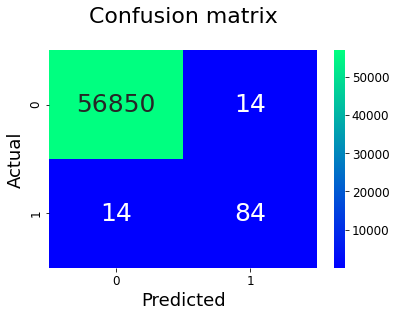

In [60]:
cred_RF_confusion_adasyn = metrics.confusion_matrix(y_test , y_pred_RF_adasyn)
print("confusion matrix of RF with ADASYN:")
print(cred_RF_confusion_adasyn)
sns.heatmap(pd.DataFrame(cred_RF_confusion_adasyn), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 5.3 average precision score

In [61]:
cred_RF_ave_adasyn = average_precision_score(y_test,y_pred_RF_adasyn)*100
print("Average precision score of logistic with random undersampling: %0.2f " % cred_RF_ave_adasyn)

Average precision score of logistic with random undersampling: 73.49 


#### 5.4 ROC_AUC

AUC -  0.9284483278398585 



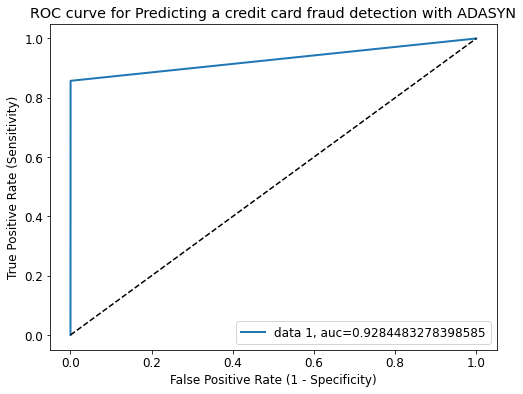

In [62]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF_adasyn)

RF_auc_adasyn = metrics.roc_auc_score(y_test, y_pred_RF_adasyn)
print("AUC - ",RF_auc_adasyn,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(RF_auc_adasyn))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with ADASYN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 5.5 precision recall curve

f1_RF=0.857


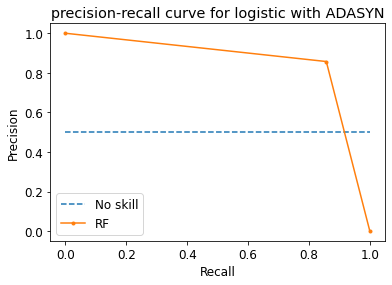

In [63]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_RF_adasyn)
f1_ruc_adasyn = metrics.f1_score(y_test, y_pred_RF_adasyn)
print('f1_RF=%.3f' % (f1_ruc_adasyn))
plt.title("precision-recall curve for logistic with ADASYN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'RF')
plt.legend()
plt.show()

### 6. Summary (random forest)

#### 6.1 accuracy score

In [64]:
from pandas import Series,DataFrame
import pandas as pd

In [65]:
data_acc = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[99.96,97.35,99.96,99.95 ,99.95 ]
       }
df_acc = DataFrame(data_acc)
print(df_acc)

                    method  score
0            Random Forest  99.96
1  RF random undersampling  97.35
2   RF random oversampling  99.96
3            RF with STOME  99.95
4           RF with ADASYN  99.95


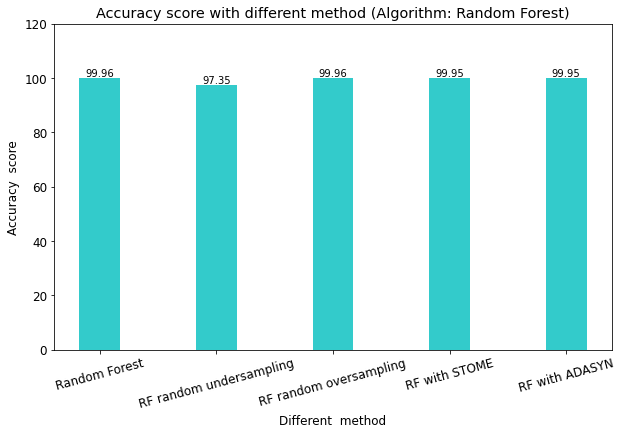

In [66]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_acc['score']))

xticks1=list(df_acc['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Accuracy  score')
plt.title('Accuracy score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,120)

plt.show()

#### 6.2 recall

In [67]:
data_recall = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[0.7755,0.9184,0.7755,0.8469 ,0.8469 ]
       }
df_recall = DataFrame(data_recall)
print(df_recall)

                    method   score
0            Random Forest  0.7755
1  RF random undersampling  0.9184
2   RF random oversampling  0.7755
3            RF with STOME  0.8469
4           RF with ADASYN  0.8469


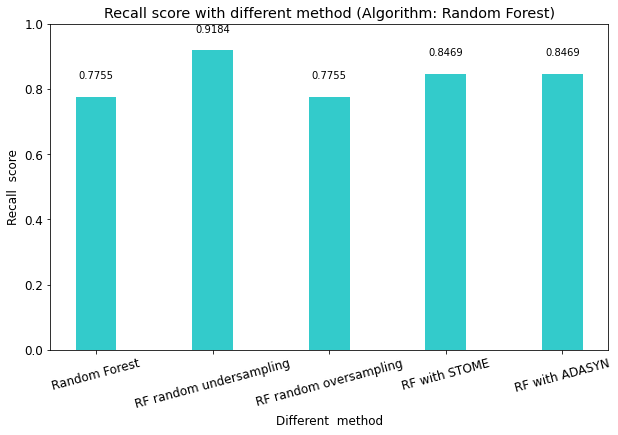

In [68]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_recall['score']))

xticks1=list(df_recall['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Recall  score')
plt.title('Recall score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,1)

plt.show()

#### 6.3 average precision score

In [69]:
data_ave = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[75.60 ,5.21 ,75.60 ,73.25  ,72.50 ]
       }
df_ave = DataFrame(data_ave)
print(df_ave)

                    method  score
0            Random Forest  75.60
1  RF random undersampling   5.21
2   RF random oversampling  75.60
3            RF with STOME  73.25
4           RF with ADASYN  72.50


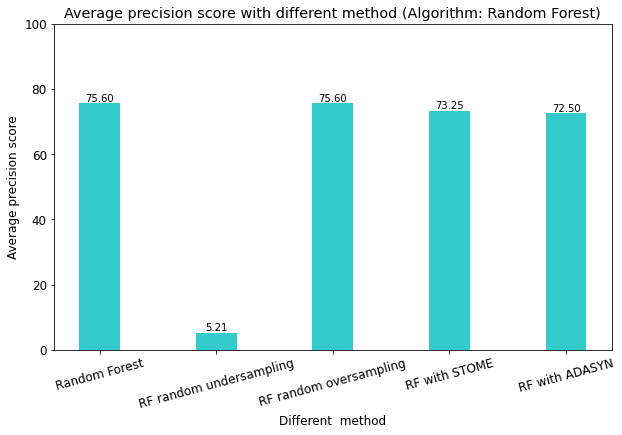

In [70]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_ave['score']))

xticks1=list(df_ave['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Average precision score')
plt.title('Average precision score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,100)

plt.show()

#### 6.4 ROC_AUC

In [71]:
data_auc = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[ 0.8877,0.9459,0.9459,0.9459 ,0.9233 ]
       }
df_auc = DataFrame(data_auc)
print(df_auc)

                    method   score
0            Random Forest  0.8877
1  RF random undersampling  0.9459
2   RF random oversampling  0.9459
3            RF with STOME  0.9459
4           RF with ADASYN  0.9233


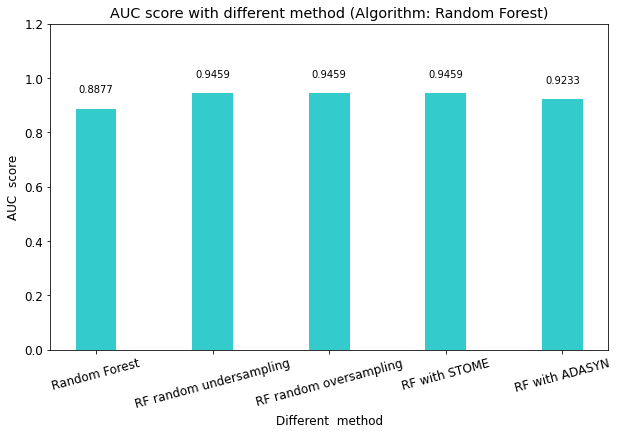

In [72]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_auc['score']))

xticks1=list(df_auc['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('AUC  score')
plt.title('AUC score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,1.2)

plt.show()

#### 6.5 F1

In [73]:
data_F1 = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[0.864,0.107,0.864,0.856 ,0.851 ]
       }
df_F1 = DataFrame(data_F1)
print(df_F1)

                    method  score
0            Random Forest  0.864
1  RF random undersampling  0.107
2   RF random oversampling  0.864
3            RF with STOME  0.856
4           RF with ADASYN  0.851


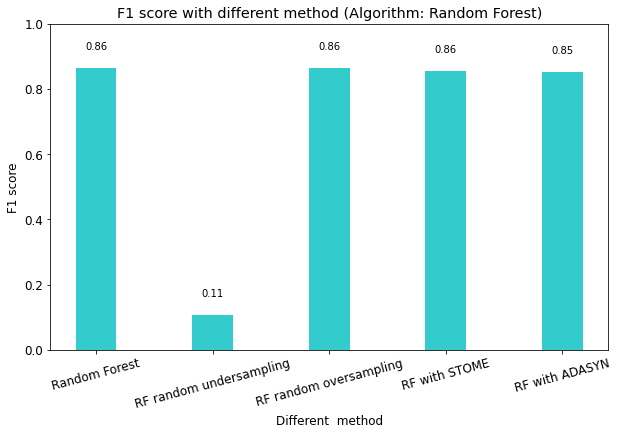

In [74]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_F1['score']))

xticks1=list(df_F1['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('F1 score')
plt.title('F1 score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,1)

plt.show()

In [75]:
print('Recall_randomForest : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_randomforest)))
print('Recall_RF_undersampling : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_ruc)))
print('Recall_RF_oversampling : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_ros)))
print('Recall_RF_smote : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_adasyn)))
print('Recall_RF_adasyn : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_RF_adasyn)))

Recall_randomForest : 0.77551
Recall_RF_undersampling : 0.93878
Recall_RF_oversampling : 0.79592
Recall_RF_smote : 0.85714
Recall_RF_adasyn : 0.85714


In [76]:
data_recall_RF = {
         'method':['Random Forest','RF random undersampling','RF random oversampling','RF with STOME','RF with ADASYN'],
         'score':[77.55 ,93.88, 79.59, 85.71 ,85.71]
       }
df_recall_RF = DataFrame(data_recall_RF)
print(df_recall_RF)

                    method  score
0            Random Forest  77.55
1  RF random undersampling  93.88
2   RF random oversampling  79.59
3            RF with STOME  85.71
4           RF with ADASYN  85.71


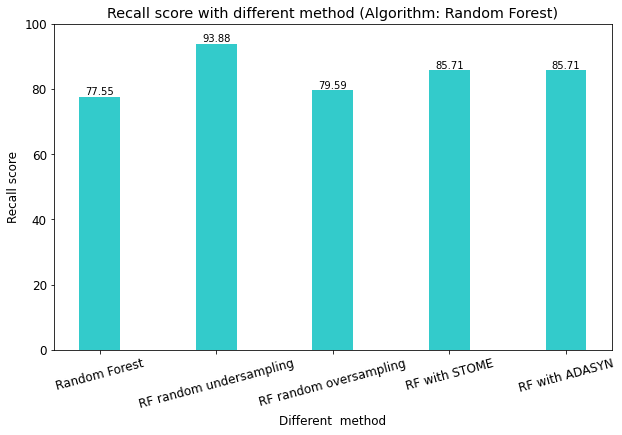

In [78]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_recall_RF['score']))

xticks1=list(df_recall_RF['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Recall score')
plt.title('Recall score with different method (Algorithm: Random Forest)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,100)

plt.show()